In [1]:
# As usual, a bit of setup
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# pd.set_option('display.max_rows', 1000)

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## <u>Problem 1: Distances and Norms</u>

<u>**Problem 1.**</u> In a cell by itself, define a function that accepts two equal sized NumPy arrays(vector) and return their cosine similarity. Use Numpy functions to calculate the dot product of the vectors and their magnitude

**My note:**

- [more info](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

**Dot Procduct**

- Intuition: The dot product tell you what amount of one vector go to other vector direction. 
$$
\vec{v1} . \vec{v2} = |v1||v2|cos(\theta) 
$$
- In this case, the $cos(\theta)$ tell the strength on the direction of 2 vector. since cos() have range of 0 to 1.

**Cosine simlilarity**

- A measure that calcullate the cosin e of the angle between 2 vector. This metric measure the orientation and not the magnitude. Idea: measure the angle between the 2 vector(or documents)

$$
cos(\theta) = \frac{\vec{v1} . \vec{v2}}{|v1||v2|}
$$


###### Answer

In [2]:
#NOTE: this function return cos(theta) not theta
def cos_similarity(v1, v2):
    '''
    This function compute the cos_similiarity given 2 **zero rank matrix**
    '''
    if(v1.shape != v2.shape):
        raise ValueError('Dim error: %s not same as %s'%((v1.shape,),(v2.shape,)))
    num = v1.T.dot(v2)
    denom = np.linalg.norm(v1) * np.linalg.norm(v2)#Compute the magnitude
    return num/denom

In [3]:
v1 = np.array([121,51,6])
v2 = np.array([2,51,61])
v3 = np.array([23.1,36.2,457.0])
v4 = np.array([2.2,62.0,-1])
#Expected: 0.30694346290213681
print('expected:',0.30694346290213681, 'answer:',cos_similarity(v1, v2))
print('expected:',0.30694346290213681, 'answer:',cos_similarity(v3, v4))

expected: 0.3069434629021368 answer: 0.306943462902
expected: 0.3069434629021368 answer: 0.064543281456


**Problem 2.** <br>
**a.** Write a brief description of what cosine similarity measures focusing on the geometric interpretation

- Base on the geometric interpretation, the similarity cosine measures the angles between 2 vectors. In other words, in a data space by looking at the similarity cosine measure we are able to determine the orientation of datas projected in 

**b.** Explain the geometric interpretation of two vectors with cosine similarity of 0 

- When cosine similarity measure equals to 0 (`cos(90) = 0`), this tell that the data space is 90 degrees apart in their orientation. Further, the vectors are in difference space. One can coludes that the 2 attribute in vectors are not related(independent)

- Ex:
```python
v1 = np.array([[0,3]])
v2 = np.array([[2,0]])
```

- The above example would result cosine similarity measure to be zeros. As in each dimension, only one vector contribute to that data space.


**c.**Explain the geometric interpretation of two vectors with a cosine similarity of 1 or -1 

```
cos(0) = 1
cos(180) = -1
```

In the first case where the angle between vectors are 0 degrees apart. This indicate that vectors are in the same direction and result in the maximum strength.

In the second case where the angle between vectors are 180 apart. This indicate that vectors are in the same axis(dimension) but in a complete opposite direction. 

<img src='https://user-images.githubusercontent.com/35666615/51205811-5a5dc300-18cc-11e9-84b6-6f57d7333ebc.PNG' width='500' height='500'>


**3.** Manually define 3 numpy arrays (x1,x2,x3) and randomly generate 1 (x4) such that: <br>
a) Each has 2 dimensions, and is integer valued from the set [-10,10]<br>
b) x1 and x2 are collinear <br>
c) x1 and x3 are orthogonal <br>
d) x4 is randomly generated using NumPy’s random module, according to the criteria in a)<br>

- My note:
    - Colinearity of 2 point: Mean if vectors can be draw on a lines. Points are colinear if they all be drawn on a line. So 2 vector of 2 dim are alway colineary
    - Colinearity: linear association between two dependent and independent variable. Two variable are perfectly colinear if there is an exact linear relationship between them. 
    - Ex: consider, $\vec{a}$ and $\vec{b}$. The 2 vector is colinear if one can be represent by multiple of other. (e.g $\vec{a} = \lambda\vec{b}$) where $\lambda$ is a scalar constant[(more info)](https://www.youtube.com/watch?v=RVVotbmzv1o)

In [28]:
x1 = np.array([1,1])
x2 = np.array([2,2])
x3 = np.array([-1,1])
x4 = np.random.randint(low=-10,high=10, size=(2,))
print("x4:", x4)

x4: [ 3 -7]


**4.** Print the result of your cosine similarity function applied to the pairs (x1,x2), (x1,x3), and (x1,x4) in a human-understandable way, e.g. “The cosine similarity of [1 1] and [-10 6] is -0.242535” 

Note: Cosine Similarity is useful in machine learning when we want a similarity metric between two vectors that is not dependent on their magnitudes. For this reason, it is frequently used in natural language processing to compare the content similarity of documents, even if they differ greatly in length

In [29]:
print("The Cosine similarity of(x1,x2) [%s] and [%s] is %f"%
      (np.array_str(x1),np.array_str(x2),cos_similarity(x1,x2)) )

print("The Cosine similarity of (x1,x3)[%s] and [%s] is %f"%
      (np.array_str(x1),np.array_str(x3),cos_similarity(x1,x3)) )

print("The Cosine similarity of (x1,x4)[%s] and [%s] is %f"%
      (np.array_str(x1),np.array_str(x4),cos_similarity(x1,x4)) )

The Cosine similarity of(x1,x2) [[1 1]] and [[2 2]] is 1.000000
The Cosine similarity of (x1,x3)[[1 1]] and [[-1  1]] is 0.000000
The Cosine similarity of (x1,x4)[[1 1]] and [[ 3 -7]] is -0.371391


**5.** Use matplotlib.pyplot’s “quiver” function to graph all of your vectors on the same plane, assigning each a different color <br>
a) example: [stackvoverflow](file:///C:/Users/datng/OneDrive/college/unlCourses/csce478-machine-learning/csce478-s19-Machine-Learning/handout/cs478-Recitation02.pdf)

In [30]:
#Stack all the vector
all_v = np.array([x1,x2,x3,x4])
print(all_v)

[[ 1  1]
 [ 2  2]
 [-1  1]
 [ 3 -7]]


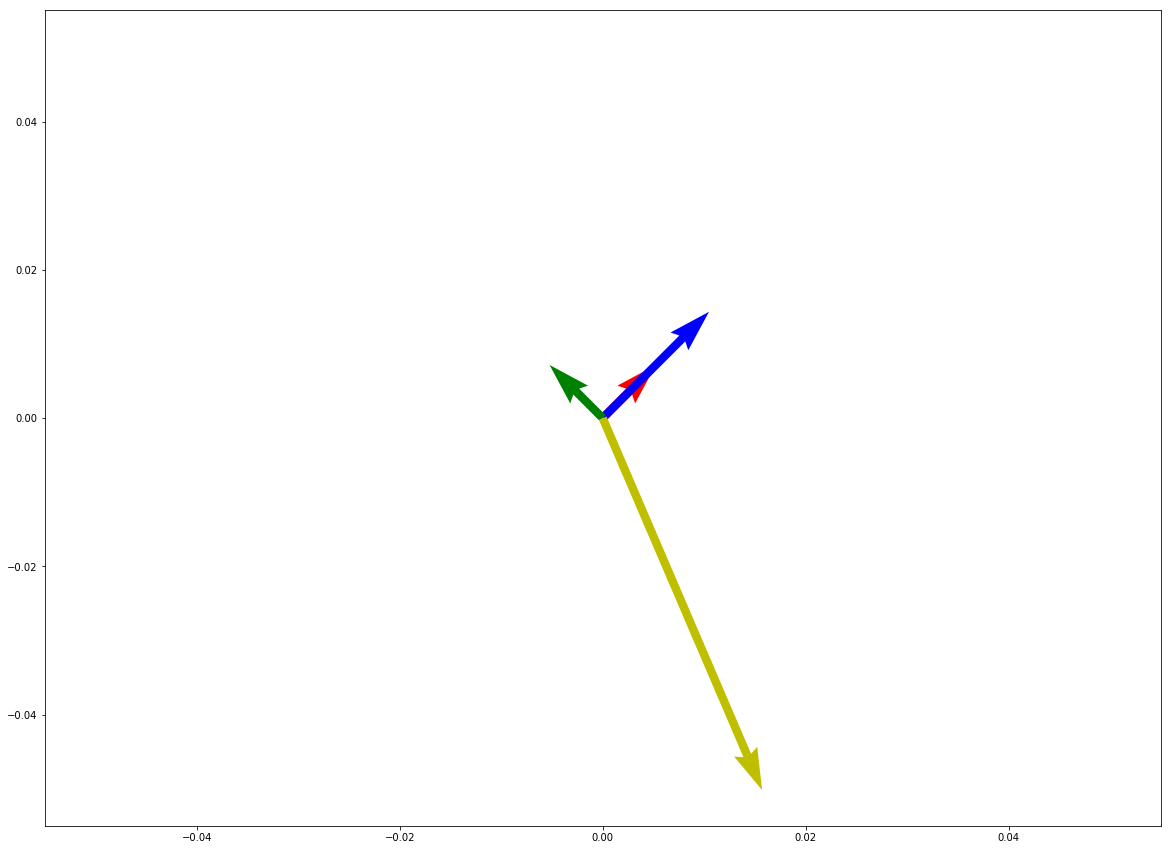

In [31]:
origin = [0], [0] # origin poin
plt.quiver(*origin, all_v[:,0], all_v[:,1],color=['r','b','g','y'], scale=21)
plt.show()

**6.** Compute and print out the following values for x4: L1 norm (aka Manhattan), L2 norm (aka Euclidean), L4, and L10 norms 

In [32]:
norm = {}
norm['L1'] = lambda x:np.abs(x).sum()
norm['L2'] = lambda x:np.sqrt((x**2).sum())
norm['L4'] = lambda x:np.sqrt((x**4).sum())
norm['L10'] = lambda x:np.sqrt((x**10).sum())

In [33]:
for key,L in norm.items(): 
    print('%s norm: %f'%(str(key),L(x4)))

L1 norm: 10.000000
L2 norm: 7.615773
L4 norm: 49.819675
L10 norm: 16808.756587


**7.** Compute and print out the following values for the pair of vectors (x1,x4): L1 distance (Manhattan), L2 distance (Euclidean), L4 distance, and L10 distance 

In [34]:
norm2point = {}
norm2point['L1'] = lambda x1,x2:np.abs(x1-x2).sum()
norm2point['L2'] = lambda x1,x2:np.sqrt(((x1-x2)**2).sum())
norm2point['L4'] = lambda x1,x2:np.sqrt(((x1-x2)**4).sum())
norm2point['L10'] = lambda x1,x2:np.sqrt(((x1-x2)**10).sum())

In [35]:
for key,L in norm2point.items(): 
    print('%s norm(x1,x4): %f'%(str(key),L(x1,x4)))

L1 norm(x1,x4): 10.000000
L2 norm(x1,x4): 8.246211
L4 norm(x1,x4): 64.124878
L10 norm(x1,x4): 32768.015625


------

## <u> Problem 2: Rank, Matrix Inverses, and Solving Linear Systems</u>

**1.** Using the seed 402, generate a uniform random 3x3 matrix with continuous values from the set [10,10). We will call this matrix Mat for the remainder of the problem. <br>
a. Print the matrix<br>
b. Print the rank of the matrix<br>

**my note:**

- The [rank of a matrix](https://stattrek.com/matrix-algebra/matrix-rank.aspx) tell the degree of freedom of the system(in this case a matrix). Rank of matrix equal to the total of number of independent variable in the system(represent by a matrix in this case). Total number of independent variable can be find by detmine the REF of the matrix
<img src="https://user-images.githubusercontent.com/35666615/51213288-4f149280-18e0-11e9-894a-d0f5497ace22.jpg">

In [37]:
np.random.seed(402)
Mat = np.random.uniform(low=-10.0, high=10.0, size=(3,3))
print(Mat)
print("Rank of W:", np.linalg.matrix_rank(Mat))

[[-8.98284725 -0.46598279 -3.76715685]
 [ 8.03269592 -0.09947017 -0.03530441]
 [ 8.23689424  9.13449309 -3.09868078]]
Rank of W: 3


**2.** In a markdown cell, explain the relationship between the rank of a matrix and the existence of the matrix inverse. Explain the geometric intuition for this relationship. 

My note:<br>
Does the Inverse Exist?[(more info)](https://stattrek.com/matrix-algebra/matrix-inverse.aspx)<br> 

- There are 2 ways to detemine whether the inverse of a square matrix exist:
    - **Detemine its ranks.** The rank of a matrix is a unique number associated with a squared matrix. If the rank of an n x n matrix is less than n, the matrix does not have an inverse. Why? because a rank less than its matrix dimension mean that the space of all vector in matrix is missing one dimension(otherword, there exist at least one dimension in the matrix where it is null or nothing)
    - **Compute its determinant**. The determinant is another unique number associated with a square matrix. When the determinant for a square matrix equal to zero, the inverse for that matrix does not exist. 

#### Answer: 
- The rank of a matrix is a unique number associated with a squared matrix. If the rank of an n x n matrix is less than n, the matrix does not have an inverse. Why? because a rank less than its matrix dimension mean that the space of all vector in matrix is missing one dimension(otherword, there exist at least one dimension in the matrix where it is null or nothing)

**3.** Calculate and print the multiplicative inverse of Mat using NumPy. 

- **NOTE**: the result of this problem is the Identity matrix. some of the result are `-6.93889390e-18, -6.93889390e-17` which is close to zeros

In [38]:
I = Mat.dot(np.linalg.inv(Mat))
print(I)

[[  1.00000000e+00  -1.11022302e-16   0.00000000e+00]
 [  8.50014503e-17   1.00000000e+00  -1.40946282e-18]
 [  0.00000000e+00   1.11022302e-16   1.00000000e+00]]


**4.** Use the inverse of Mat to solve the equation below for x. Note that * will denote standard matrix multiplication: 
$$
Mat * x = b\\
where\,b = [1\,2\,3].T
$$

In [39]:
b = np.array([[1,2,3]])
x = np.linalg.inv(Mat).dot(b.T)
print(x)

[[ 0.24324697]
 [-0.17057196]
 [-0.82437947]]


In [40]:
print('Mat dot x = b\n', Mat.dot(x))

Mat dot x = b
 [[ 1.]
 [ 2.]
 [ 3.]]


**5.** Use NumPy’s built-in solver (linalg.solve) to find x numerically <br>
a. Print the new x <br>
b. Always do this in the real world instead of calculating the inverse first in order to preserve numerical stability as much as possible. It can be an issue on larger problems. <br>

In [41]:
newX = (np.linalg.solve(Mat, b.T))
print(newX)

[[ 0.24324697]
 [-0.17057196]
 [-0.82437947]]


In [42]:
## Quick sanity check
np.dot(Mat, newX)

array([[ 1.],
       [ 2.],
       [ 3.]])

**6.** Define a new matrix,

```python
newMat = [1,-1,1]
         [-3,2,4]
         [-1,0,6]
```

a. Print newMat's rank <br>
b. Print newmat's inverse<br>
c. print newMat * newMatInverse<br>
d. Solve the equation in part 4, subtitute newMat for Mat<br>
e. Notice the lack of errors and think about the implications when you may need to use these functions in designing a machine learning algorithm. Write these thoughts in a separate markdown cell. 

In [43]:
newMat = np.array([[1,-1,1],
                   [-3,2,4],
                   [-1,0,6]])
#get Rank
print("a. Rank:", np.linalg.matrix_rank(newMat))

# Get inverse
print("\nb. Inverse:")
newMatInverse = np.linalg.inv(newMat)
print(newMatInverse)

#newMat * newMatInverse
print("\nc. newMat * newMatInverse")
print(newMat.dot(newMatInverse))

print("\nd. Solve the equation in part 4, substituting newMat for Mat")
b = np.array([[1,2,3]])
print(np.linalg.solve(newMat, b.T))


a. Rank: 2

b. Inverse:
[[ -1.35107989e+16  -6.75539944e+15   6.75539944e+15]
 [ -1.57625987e+16  -7.88129935e+15   7.88129935e+15]
 [ -2.25179981e+15  -1.12589991e+15   1.12589991e+15]]

c. newMat * newMatInverse
[[ 0.  0.  1.]
 [ 0.  0. -2.]
 [ 0.  0.  0.]]

d. Solve the equation in part 4, substituting newMat for Mat
[[ -6.75539944e+15]
 [ -7.88129935e+15]
 [ -1.12589991e+15]]


e. Notice the lack of errors and think about the implications when you may need to use these functions in designing a machine learning algorithm. Write these thoughts in a separate markdown cell.

- Before computing  the inverse or any matrix operation like dot product, cross product,.. it is good practice to double check the dimension and rank of the matrix. 
- In the example above, result for b) is wrong as this newMat does not have an inverse. Python will not check but would do what I tell it to do. 

**7.** Now approximate the solution for x in equation 4 with newMat substituted using linalg.lstsq, which performs least squares approximation 

In [44]:
'''
x : {(N,), (N, K)} ndarray

Least-squares solution. If b is two-dimensional, the solutions are in the K columns of x.
residuals : {(), (1,), (K,)} ndarray
Sums of residuals; squared Euclidean 2-norm for each column in b - a*x. If the rank of a is < N or M <= N, this is an empty array. If b is 1-dimensional, this is a (1,) shape array. Otherwise the shape is (K,).
rank : int
Rank of matrix a.
s : (min(M, N),) ndarray
Singular values of a.
'''
lst_solution, residual, rank, s = np.linalg.lstsq(newMat, b.T)
print("Least square solution")
print(lst_solution)
print("\nResidual",residual)
print("\nrank",rank)
print("\nsingular value(sqrt(non-zeros eigenvalue)) of a:")
print(s)

Least square solution
[[ 0.03100775]
 [-0.10271318]
 [ 0.53294574]]

Residual []

rank 2

singular value(sqrt(non-zeros eigenvalue)) of a:
[ 7.77600954  2.92124557 -0.        ]


b. Print newMat*solution which we will cal b_hat since it is an approximation

In [45]:
b_hat = newMat.dot(lst_solution)
print(b_hat)

[[ 0.66666667]
 [ 1.83333333]
 [ 3.16666667]]


c. Print the Euclidian distance between b and b_hat 

In [46]:
print("Euclidian(L2) between b and b_hat: ",norm2point['L2'](b.T, b_hat))

Euclidian(L2) between b and b_hat:  0.408248290464


## <u> Problem 3: Determinants, Eigenvalues, and Positive Definite Matrices </u>

1. Using a normal distribution and the seed 88, generate a random 3x3 matrix with a mean of 5 and variance of 10. This matrix will be referred to as Mat2 for the rest of the problem. 

In [47]:
np.random.seed(88)
#Answer number 1(2 answer for this problem so)
sigma = np.sqrt(10)
mu = 5
Mat2 = sigma * np.random.randn(3,3) + mu
print(Mat2)

[[  5.33799785  11.97540026   8.02491684]
 [  5.21633489   8.37893737   8.15336839]
 [  2.05418684   7.30982403   4.45857477]]


In [48]:
print(np.mean(Mat2))
print(np.var(Mat2))

6.76772680361
7.27898277827


**2.** Calculate the determinant of mat2 and print it

In [49]:
d = np.linalg.det(Mat2)
print("Det:",d)

Det: -28.801935084


**3.** In a markdown box, give the brief geometric intuition for what a determinant means and what it means for a determinant to be negative. What would a 0 determinant mean then? 

- [Meaning of determinant(3Blue1brown)](https://www.youtube.com/watch?v=Ip3X9LOh2dk)

Answer:<br>

- important of linear tranformation is to measure how much the transformation stretch or shrink space out(deteminant will help on that). More specifically, to measure how much a specific area scaled. 
- ex:

``
initially: 
a = [1 0]
    [0 1]
Area(a) is 1
after a transform, we have
[3 0]
[0 2]
and the area now scaled 6. this indicate that 
det[3 0] = 6
   [0 2] 
``

- We can say that the determinant is `k` if that transformation increase the area by a fraction of k. 
- The determination is 0(det = 0) if it squish all the area in to a line or even a point. Since then the area of any region to be zeros. 
- Concept of determinant allow negative value. How do we scale a number by negative? (IT have to do with orientation). Asscoiate with flipping space.(inverse orientation of space). The absolute values still tell the scaling factor

**4.** Calculate the eigenvalues and eigenvectors of Mat2, and print them (printing the pair of returned arrays is fine) 

In [50]:
w, v = np.linalg.eig(Mat2)
print("Eigen Value:")
print(w)
print("\nEigenVector(vertical stack)")
print(v)

Eigen Value:
[ 19.75530817   0.65297116  -2.23276935]

EigenVector(vertical stack)
[[-0.70696977 -0.8022028   0.42320826]
 [-0.59649451 -0.08242487 -0.67359825]
 [-0.37998426  0.59133477  0.60593743]]


**5.** In a markdown cell, give a geometric understanding of what an eigenvector and its associated eigenvalue represent. What does a 0 eigenvalue mean? 

- Eigenvector tell the direction of the data space. When looking at the eigenvector we can dertermine the behavior of the data. In other word, Eigenvector tell us the concepts in our data. Each Eigenvectors is a concept. Concept means something that all data have in similar
- Eigenvalue give the strength of the eigenvector. A really high eigen vector indicate that data space lean toward our eigenvector. In other word, eigenvalue tell the strengh of the concept in each eigenvalue direction. a High eigenvalue tell that a concept is highly trustable. Taking advantage of eigenvalue, we can reduce the data dimension by get rid of data dimension with low eigenvalue strength. 
- Having a 0 eigenvalue mean that there is a null space. We can compute the rank of the matrix and determine if a matrix is invertible by looking at the eigenvalue.